#Relationship between L1000 gene expression and compound similarity

We calculated the spearman correlation values for each drug pair in the L1000 perturbation data. This data was combined with the chemical compound similarity dataframe that was imported on the basis of drug pair. The relationship between spearman correlation values for the L1000 perturbation data and chemical compound similarity was illustrated with a seaborn JointGrid. 

In [1]:
import itertools
import math
import gzip

import pandas
import matplotlib.pyplot as plt
import seaborn
import numpy
import scipy
import random

%matplotlib inline

In [2]:
#import the drugbank table and transform in a way 
path = '/Users/sabrinalchen/Downloads/consensus_drugbank.tsv.gz'
pert_df = pandas.read_table(path)
pert_df = pert_df.transpose()
pert_df.columns = pert_df.iloc[0]
pert_df = pert_df.drop(pert_df.index[[0]])
pert_df.head()

pert_id,DB00014,DB00091,DB00121,DB00130,DB00132,DB00136,DB00140,DB00146,DB00150,DB00154,...,DB08995,DB09002,DB09004,DB09009,DB09010,DB09015,DB09019,DB09020,DB09022,DB09023
10007,0.649,-4.878,-1.899,-2.341,-1.854,-3.175,-0.042,-0.25,0.054,-3.042,...,1.008,0.339,-0.024,0.35,-0.554,-0.642,-0.159,3.519,-0.04,-1.62
1001,-1.952,2.527,0.306,0.494,2.649,1.512,-0.948,-0.034,-0.626,0.836,...,-1.339,0.856,0.123,-0.023,0.449,1.979,0.418,1.698,1.451,0.709
10013,-0.133,10.73,0.953,0.244,-1.992,-0.201,-1.462,-0.594,0.522,1.701,...,1.155,1.312,0.476,0.288,-1.111,-0.633,-1.518,-3.01,-1.273,1.908
10038,1.057,-2.106,-1.185,-2.472,0.003,0.248,-0.784,-2.275,0.514,-2.231,...,0.114,0.556,0.723,-3.062,-0.64,-0.624,-0.372,-9.318,-0.624,-0.334
10046,0.556,-0.396,1.037,-0.193,1.162,1.251,-0.992,0.352,-0.632,-0.338,...,0.988,0.551,0.055,1.973,-0.635,0.887,0.585,0.313,-1.197,-0.25


In [3]:
#turn dataframe values into float so that the correlation method will work
pert_df = pert_df.astype(float)

In [4]:
#find the spearman correlation for the pert dataframe
corr_df = pert_df.corr(method = 'spearman')
corr_df.reset_index()
corr_df.head()

pert_id,DB00014,DB00091,DB00121,DB00130,DB00132,DB00136,DB00140,DB00146,DB00150,DB00154,...,DB08995,DB09002,DB09004,DB09009,DB09010,DB09015,DB09019,DB09020,DB09022,DB09023
pert_id,,,,,,,,,,,,,,,,,,,,,
DB00014,1.000000,-0.251262,-0.165518,-0.304296,-0.155874,0.009563,-0.168774,-0.366212,0.383279,-0.204003,...,0.386879,0.301937,0.398820,-0.109708,-0.287890,-0.149865,-0.164105,-0.279420,-0.046202,-0.308580
DB00091,-0.251262,1.000000,0.091732,0.226410,-0.019060,0.169563,0.056741,0.342958,-0.221166,0.013245,...,-0.078916,-0.134762,-0.135429,0.088257,0.241890,0.193703,0.139487,0.319297,-0.024904,0.144586
DB00121,-0.165518,0.091732,1.000000,0.169709,0.494393,0.204156,0.277851,0.202495,-0.073947,0.518338,...,-0.097287,0.001059,-0.145142,0.018473,0.101056,0.111719,0.049134,0.082951,0.385036,0.527089
DB00130,-0.304296,0.226410,0.169709,1.000000,0.175796,0.014267,0.278598,0.561723,-0.417916,0.009954,...,-0.073290,-0.284398,-0.305992,0.236627,0.429673,0.253029,0.116343,0.270696,-0.104485,0.175445
DB00132,-0.155874,-0.019060,0.494393,0.175796,1.000000,0.155758,0.307825,0.265624,-0.175617,0.384992,...,-0.225189,-0.210114,-0.250713,0.135000,0.148876,0.123150,0.198210,0.010050,0.433729,0.409052


In [5]:
#reformat the correlation dataframe 
corr_df = corr_df.unstack()
corr_df.columns = ['correlation']
corr_df = pandas.DataFrame(corr_df)
corr_df = corr_df.reset_index(0)
corr_df.columns = ['compound_0', 'correlation']
corr_df = corr_df.reset_index(0)
corr_df.columns = ['compound_0', 'compound_1', 'correlation']
corr_df.head()

,compound_0,compound_1,correlation
0,DB00014,DB00014,1.000000
1,DB00091,DB00014,-0.251262
2,DB00121,DB00014,-0.165518
3,DB00130,DB00014,-0.304296
4,DB00132,DB00014,-0.155874


In [6]:
#import similarity data
path1 = '/Users/sabrinalchen/Downloads/similarity.tsv.gz'
similarities_df = pandas.read_table(path1, header=True, names = ['compound_0', 'compound_1', 'similarity'])
similarities_df.head()

,compound_0,compound_1,similarity
0,DB05107,DB05105,0.0441
1,DB05107,DB05104,0.1457
2,DB05107,DB08423,0.1268
3,DB05107,DB05102,0.1000
4,DB05107,DB08421,0.1875


In [7]:
#merge the correlation and similarity dataframes
spread_df = pandas.merge(corr_df, similarities_df)
spread_df.columns = ['compound_0', 'compound_1', 'transcriptional similarity', 'chemical similarity']
spread_df.head()

,compound_0,compound_1,transcriptional similarity,chemical similarity
0,DB00091,DB00014,-0.251262,0.1911
1,DB00130,DB00014,-0.304296,0.1011
2,DB00132,DB00014,-0.155874,0.0971
3,DB00136,DB00014,0.009563,0.1796
4,DB00150,DB00014,0.383279,0.2381


In [8]:
#remove all values with transcriptional similarity equal to 1
spread_df = spread_df[spread_df['transcriptional similarity'] != 1.0]

In [9]:
#show the top 10 most chemically similar compounds
subset = spread_df[spread_df['chemical similarity'] >= 0.9]
subset = subset.sort('chemical similarity', ascending = False)
subset.head(10)


,compound_0,compound_1,transcriptional similarity,chemical similarity
129426,DB00570,DB00541,0.780421,0.9550
426858,DB00877,DB01590,0.329436,0.9477
375524,DB00199,DB01211,0.147024,0.9442
195175,DB00445,DB00694,0.830536,0.9378
195378,DB00997,DB00694,0.830536,0.9378
553171,DB01590,DB06287,0.303855,0.9323
411012,DB00390,DB01396,0.976787,0.9276
56957,DB00950,DB00342,0.016471,0.9268
44772,DB00485,DB00301,0.144745,0.9259
485289,DB00175,DB03785,-0.098181,0.9259


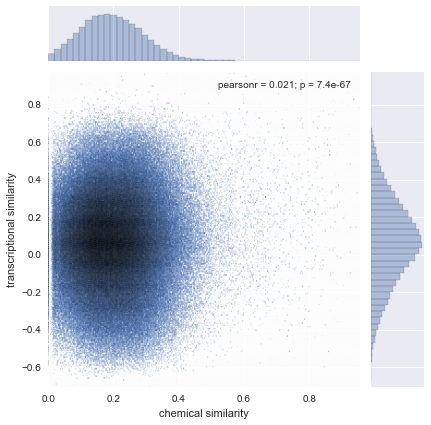

In [15]:
x=spread_df['chemical similarity']
y=spread_df['transcriptional similarity']
similarity2 = seaborn.jointplot(x,y, bins = "log", kind='hex')
similarity2.savefig('figure/similarity2.png')

In [12]:
#CREATE THE JACCARD MEAN VS SIMILARITY GRAPH

#create column for rounded similarity
spread_df['rounded_similarity'] = spread_df['chemical similarity'].round(decimals = 1)

#group the dataframe by the column for rounded similarity
grouped = spread_df.groupby('rounded_similarity', sort = True)

#sort each section into the means of the jaccard 
grouped = grouped.mean()

#drop the "similarity column" in preparation for graphing
grouped.drop('chemical similarity', axis = 1, inplace = True)
grouped['index'] = grouped.index

#rename the dataframe columns
grouped.columns = ['transcriptional similarity', 'chemical similarity']

In [14]:
#show the mean breakdown for rounded similarity data
rounded_similarity_df = spread_df.groupby('rounded_similarity').size()
rounded_similarity_df

rounded_similarity
0.0     31222
0.1    185119
0.2    261133
0.3    143201
0.4     33848
0.5      5006
0.6      1291
0.7       533
0.8       281
0.9       103
1.0         1
dtype: int64

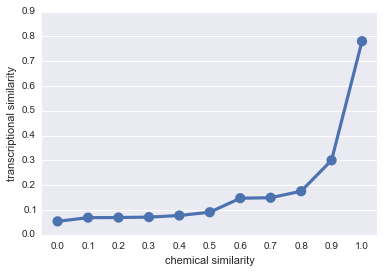

In [13]:
similarity_mean2= seaborn.pointplot(x = 'chemical similarity', y = 'transcriptional similarity', data = grouped)
fig = similarity_mean2.get_figure()
plt.ylabel('transcriptional similarity')
fig.savefig('figure/similarity_mean2.png')